In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle

In [2]:
# read in the data from the csv file
corpus = pd.read_csv('../Dataset/cleaned_train.csv', usecols=['text', 'category', 'stance'])

# display first 5 rows of the data
corpus.head()

,text,category,stance
0,بيل غيتس تلقى لقاح كوفيد19 من غير تصوير إبر و ...,celebrity,1
1,وزير صح حد يوم تحديد هل بمؤتمروا صحفي كان ما ع...,info_news,1
2,قول رح يكونو أد مسؤولي ب لبنان ما وصل لقاح ؟ أ...,info_news,1
3,تركيا . . وزير صح فخر دين قوجة تلقى أول جرع من...,celebrity,1
4,وئام وهاب شتم دول خليجي في كل طل إعلامي تسافه ...,personal,0


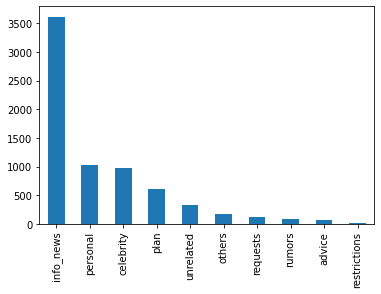

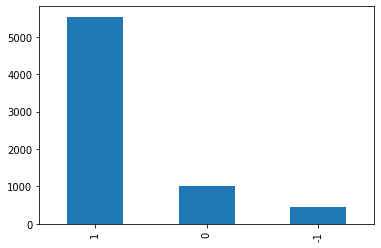

In [3]:
# display the number of classes in category column in a graph
corpus['category'].value_counts().plot(kind='bar')
plt.show()

# display the number of classes in stance column in a graph
corpus['stance'].value_counts().plot(kind='bar')
plt.show()

In [60]:
# corpus_text = corpus['text'].values
# print(corpus_text[0])

# sentence_1 = corpus_text[0].split(' ')
# print(sentence_1[0])

# for i,tweet in enumerate(corpus_text):
    # tweet = tweet.split(' ')
#     tweet = tweet[::-1]
    # tweet = ' '.join(tweet)
#     corpus_text[i] = tweet
# print(corpus_text[0]) 

#✔ No need to reverse the sentences


بيل غيتس تلقى لقاح كوفيد19 من غير تصوير إبر و لا السيرنجة و لا دواء و لابس بولو صيفي في عز شتاء و قول أن إحدى مزايا عمر ال 65 عام هي أن مؤهل حصول على لقاح . . . عنى ما كان حتاج لقاح لو كان عمر أصغر من 65
بيل


In [10]:
corpus_text_train = corpus['text'].values[0:4988]

# drop words that appear in more than 50% of the documents
vectorizer = TfidfVectorizer(ngram_range=(2,2),use_idf= True, smooth_idf= True,max_df=0.5)
X = vectorizer.fit_transform(corpus_text_train)

unique_words = vectorizer.get_feature_names_out()

In [74]:
# print(unique_words.shape)
# sth weird happens when i print words 95,96 and word 95 alone
print(str(unique_words[95:97]))
print(str(unique_words[95]))

['1962عندما' '1976']
1962عندما


In [9]:
# find a token in list of sentences
def find_token(token, sentences):
    for i, sentence in enumerate(sentences):
        if token in sentence:
            return i
    return -1

idx = find_token(unique_words[6], corpus_text_train)
print(idx)
corpus_text_train[idx]

2001


In [11]:
print(X.shape)

# use pca on X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

print(X_pca.shape)


(4988, 59678)
(4988, 2)


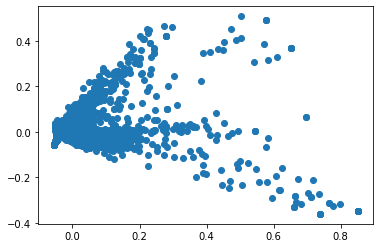

In [12]:
# scatter plot X_pca
plt.scatter(X_pca[:,0], X_pca[:,1])

In [15]:
# dump X_pca into a pickle file
with open('tfidf_pca_4988.pickle', 'wb') as f:
    pickle.dump(X_pca, f)